# Google Trends API for Python

## In this tutorial, I will demonstrate how to use the Google Trends API for getting the current trending topics on the internet.


![alt text](https://cdn-images-1.medium.com/max/1200/1*Fi6masemXJT3Q8YWekQCDQ.png)

# Introduction

[Google trends](https://trends.google.com/trends/?geo=US) is a website that analyzes and lists the popular search results on Google search based on various regions and languages. Google Trends is Google's website (obviously). With the help of this tutorial, you can get the trending results and many more from google trends website using python. You don't need to manually search and copy the trending results, the Python API called `pytrends` does the job for you. Before getting started, I want all of you guys to go through the official documentation of the `pytrends` API.

[pytrends API](https://pypi.org/project/pytrends/)



---

# Installation

The first step is to install the library manually. So, open your favorite IDE or notebook start typing the following code. 

> If you are using jupyter notebook, just type the code as it is (make sure you have '!' at the beginning)


In [3]:
#!pip install pytrends

# Implementation

## Connecting to Google

You must connect to Google first because after all, we are requesting the Google trending topics from Google Trends. For this, we need to import the method called `TrendReq` from `pytrends.request` library. Also, I will import the pandas library to store and visualize the data which you see in the later tutorial.

In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [3]:
pytrend = TrendReq(hl='en-US', tz=360, timeout=(10,25), retries=2, backoff_factor=0.1, requests_args={'verify':True})

- `hl=’en-US’` sets the language to English (US).
- `tz=360` specifies the time zone in minutes. The value 360 represents UTC+6, but you can adjust it according to your needs.

## Simple keyword search and plot

In [7]:
# Set your keyword and time frame
keyword = ['AI'] # for example we give 'AI' as the search term 
timeframe = 'today 5-y'  # Time frame: last 5 years

# Build the payload for the keyword
pytrend.build_payload(kw_list=keyword,
                       cat=0, # Category 
                       timeframe=timeframe,
                       geo='AU', # Geographic location, in this case 'Australia'
                       gprop='') # Google Search Property

# Retrieve interest over time data
interest_over_time_df = pytrend.interest_over_time() # store the interest rate which is between 0 and 100

In [9]:
interest_over_time_df

,AI,isPartial
date,,
2020-02-16,6,False
2020-02-23,6,False
2020-03-01,5,False
2020-03-08,6,False
2020-03-15,5,False
...,...,...
2025-01-19,76,False
2025-01-26,98,False
2025-02-02,89,False


<Axes: xlabel='date'>

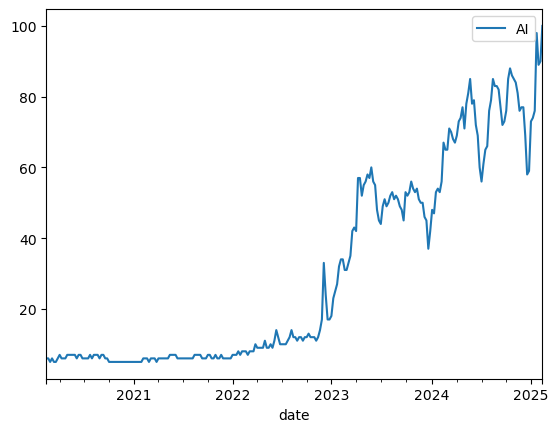

In [11]:
interest_over_time_df.drop('isPartial', axis=1, inplace= False).plot()

> **Student Exercise**
> - Perform a search for a specific single keyword BUT compare the trends across 5 different geographical locations.
> - Plot all 5 trends on the same graph for comparisson.
> - For example, what are the AI search trends in US, UK, Australia, Japan, and Brazil?

## Getting Google Trends - Extended Data Analysis

In [14]:
# Define search terms
keywords = ["Python Programming", "Data Science", "Machine Learning", "AI"] # try removing "AI"

# Build payload
pytrend.build_payload(kw_list=keywords, cat=0, timeframe='today 5-y', geo='US', gprop='') 
# kw_list =  single word as in ['Pizza'] or multiple words as in ['Pizza', 'Italian', 'Spaghetti', 'Breadsticks', 'Sausage']
# timeframe = simple ways is to specify 'today 12-m' (last 12 months) or 'today 5-y' (last 5 years) or 'all' (all available data). You can also use specific time period using specific dates, 'YYYY-MM-DD YYYY-MM-DD' example '2016-12-14 2017-01-25'
# cat = 0 (all categories), or enter a specific category or subcategory, for example cat=71, where 71 is Food & Drink categorie (see https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories for the fool list)
# geo = US - a two-letter country abbreviation. More detail available for States/Provinces by specifying additional abbreviations. For example: Alabama would be 'US-AL'. For example: England would be 'GB-ENG'
# gprop = this google search property flag defaults to web searches (geo='') but can also be 'images', 'news', 'youtube' or 'froogle' (for Google Shopping results).

# Fetch interest over time
interest_over_time_df = pytrend.interest_over_time()

# Display the data
display(interest_over_time_df.head(10))

,Python Programming,Data Science,Machine Learning,AI,isPartial
date,,,,,
2020-02-16,0,1,1,5,False
2020-02-23,0,1,1,5,False
2020-03-01,0,1,1,4,False
2020-03-08,0,1,1,4,False
2020-03-15,0,1,1,4,False
2020-03-22,0,1,1,4,False
2020-03-29,0,1,1,5,False
2020-04-05,0,1,1,5,False
2020-04-12,0,1,1,5,False


In [18]:
pytrend.categories()

{'children': [{'children': [{'name': 'Celebrities & Entertainment News',
     'id': 184},
    {'children': [{'name': 'Animated Films', 'id': 1104},
      {'name': 'Anime & Manga', 'id': 317},
      {'name': 'Cartoons', 'id': 319},
      {'name': 'Comics', 'id': 318}],
     'name': 'Comics & Animation',
     'id': 316},
    {'children': [{'children': [{'name': 'Film & TV Awards', 'id': 1108},
        {'name': 'Film & TV Production', 'id': 1117}],
       'name': 'Film & TV Industry',
       'id': 1116},
      {'children': [{'name': 'Music Awards', 'id': 1113},
        {'name': 'Record Labels', 'id': 1114}],
       'name': 'Recording Industry',
       'id': 1115}],
     'name': 'Entertainment Industry',
     'id': 612},
    {'children': [{'name': 'Clubs & Nightlife', 'id': 188},
      {'name': 'Concerts & Music Festivals', 'id': 891},
      {'name': 'Film Festivals', 'id': 1086},
      {'name': 'Live Sporting Events', 'id': 1273},
      {'name': 'Movie Listings & Theater Showtimes', 'id':

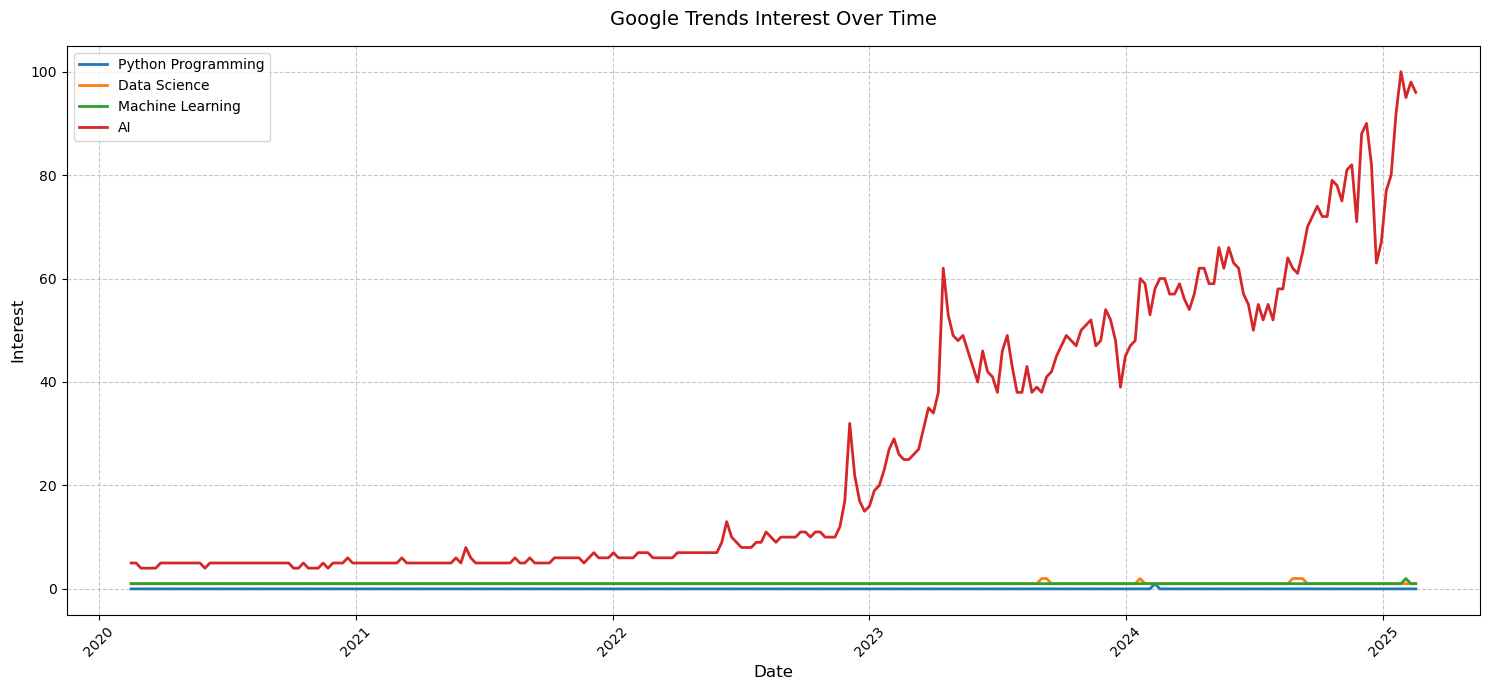

In [16]:
# Create the figure and axis with a larger size
plt.figure(figsize=(15, 7))

# Plot each keyword (column)
for column in interest_over_time_df.columns:
    if column != 'isPartial':  # Skip the isPartial column
        plt.plot(interest_over_time_df.index, interest_over_time_df[column], label=column, linewidth=2)

# Customize the plot
plt.title('Google Trends Interest Over Time', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Interest', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

## AI and ML trends

In [20]:
Multiple_keywords = [
    "Artificial Intelligence",
    "Machine Learning",
    "Deep Learning",
    "Data Analytics",
    "Natural Language Processing",
    "Content Analysis",
    "Big Data",
    "Predictive Modeling",
    "Clustering",
    "Classification",
    "Regression",
    "Feature Extraction",
    "Data Visualization",
    "Dimensionality Reduction",
    "Text Mining",
    "Sentiment Analysis",
    "Tokenization",
    "Named Entity Recognition",
    "Topic Modeling",
    "Text Classification",
    "Information Retrieval",
    "Word Embeddings",
    "Data Preprocessing",
    "Feature Engineering",
    "Supervised Learning",
    "Unsupervised Learning",
    "Neural Networks",
    "Data Cleansing",
    "Exploratory Data Analysis"
]

In [22]:
keywords = Multiple_keywords
timeframe = 'today 5-y'  # Time frame: 5 last year

In [26]:
# Create empty DataFrame with date column
dff = pd.DataFrame()

# Process one keyword at a time
for keyword in keywords:
    try:
        # Build payload for single keyword
        pytrend.build_payload(kw_list=[keyword], 
                             cat=0, 
                             timeframe=timeframe, 
                             geo='US', 
                             gprop='')
        
        # Get the data
        temp = pytrend.interest_over_time().reset_index()
        
        # Drop isPartial column
        temp.drop('isPartial', axis=1, inplace=True)
        
        # If this is the first keyword, create the base DataFrame
        if dff.empty:
            dff = temp
        else:
            # Merge with existing data
            dff = pd.merge(dff, temp, on="date")
            
        # Add a small delay to avoid hitting rate limits
        time.sleep(1)
        
        print(f"Successfully processed: {keyword}")
        
    except Exception as e:
        print(f"Error processing {keyword}: {str(e)}")
        continue

dff.set_index('date', inplace=True)
print("\nFinal DataFrame shape:", dff.shape)
print("\nColumns in final DataFrame:", dff.columns.tolist())

Successfully processed: Artificial Intelligence
Successfully processed: Machine Learning
Successfully processed: Deep Learning
Successfully processed: Data Analytics
Successfully processed: Natural Language Processing
Successfully processed: Content Analysis
Successfully processed: Big Data
Successfully processed: Predictive Modeling
Successfully processed: Clustering
Successfully processed: Classification
Successfully processed: Regression
Successfully processed: Feature Extraction
Successfully processed: Data Visualization
Successfully processed: Dimensionality Reduction
Successfully processed: Text Mining
Successfully processed: Sentiment Analysis
Successfully processed: Tokenization
Successfully processed: Named Entity Recognition
Successfully processed: Topic Modeling
Successfully processed: Text Classification
Successfully processed: Information Retrieval
Successfully processed: Word Embeddings
Successfully processed: Data Preprocessing
Successfully processed: Feature Engineering

In [30]:
dff

,Artificial Intelligence,Machine Learning,Deep Learning,Data Analytics,Natural Language Processing,Content Analysis,Big Data,Predictive Modeling,Clustering,Classification,...,Text Classification,Information Retrieval,Word Embeddings,Data Preprocessing,Feature Engineering,Supervised Learning,Unsupervised Learning,Neural Networks,Data Cleansing,Exploratory Data Analysis
date,,,,,,,,,,,,,,,,,,,,,
2020-02-16,37,81,77,61,66,42,65,65,69,76,...,65,32,43,35,45,49,59,70,49,61
2020-02-23,39,70,83,63,75,42,65,60,67,83,...,63,39,93,35,49,53,53,73,41,53
2020-03-01,34,71,76,63,63,43,62,74,71,80,...,53,45,63,31,51,45,56,60,50,60
2020-03-08,31,58,64,55,50,36,59,49,57,70,...,45,36,95,33,36,32,49,57,42,36
2020-03-15,25,52,58,44,46,27,49,55,52,55,...,50,25,41,0,30,34,44,48,42,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-19,74,88,93,96,81,67,57,71,53,75,...,51,52,37,0,62,66,74,78,77,83
2025-01-26,75,87,100,92,83,87,56,68,58,88,...,57,52,41,50,73,81,70,82,66,95
2025-02-02,75,100,98,98,81,85,52,78,65,87,...,72,59,80,63,75,72,67,91,52,73


In [32]:
# Option A: all columns
#which_columns=dff.columns

# Option B: just the selected ones
which_columns= [
    "Artificial Intelligence",
    "Machine Learning",
    "Deep Learning",
    "Natural Language Processing",
    "Big Data",
    "Data Visualization"
]

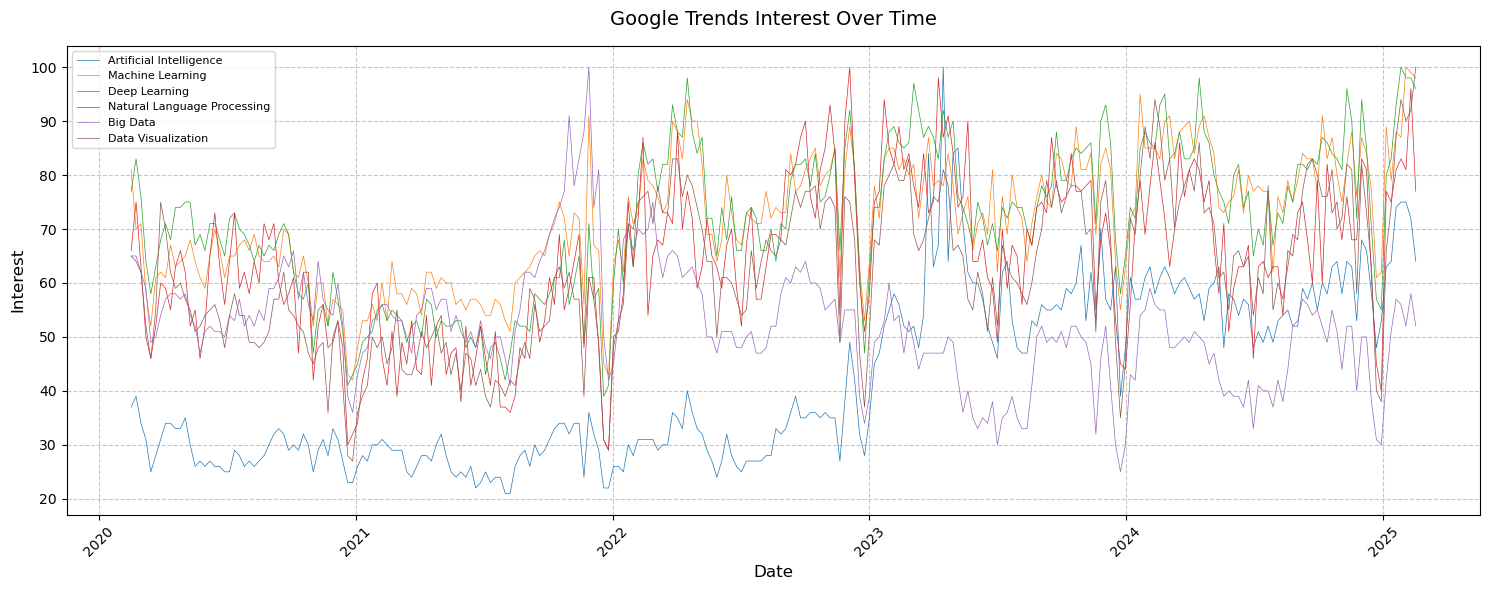

In [34]:
# Create the figure and axis with a larger size
plt.figure(figsize=(15, 6))

# Plot each keyword (column)
for column in which_columns:
    if column != 'isPartial':  # Skip the isPartial column
        plt.plot(dff.index, dff[column], label=column, linewidth=0.5)

# Customize the plot
plt.title('Google Trends Interest Over Time', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Interest', fontsize=12)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()



---



## Interest By Region

Let us see the terms which are popular in the region worldwide. I will choose, the term to be searched as "Taylor Swift" (I like her so….).

In [5]:
search_word='Taylor Swift'

In [9]:
pytrend.build_payload(kw_list=[search_word],geo='US')
# Interest by Region
df = pytrend.interest_by_region()

In [11]:
df.head(10)

,Taylor Swift
geoName,
Alabama,64
Alaska,58
Arizona,64
Arkansas,66
California,60
Colorado,75
Connecticut,82
Delaware,65
District of Columbia,91


In [13]:
df.sort_values(search_word, ascending=False)

,Taylor Swift
geoName,
Utah,100
Kansas,97
Missouri,96
Massachusetts,95
Rhode Island,91
District of Columbia,91
Pennsylvania,86
Minnesota,86
Vermont,85


**Now you might be thinking what are the values, what do they denote?**

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

Let us plot the result on a bar graph because sometimes visual representation gives a clear picture.

<Axes: xlabel='geoName'>

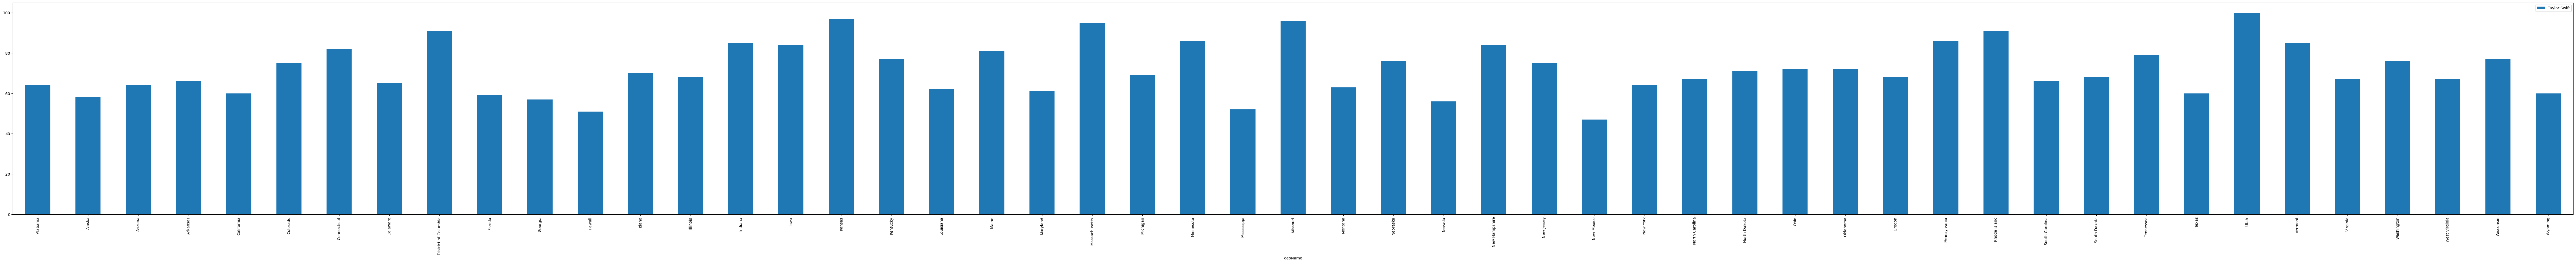

In [17]:
df.reset_index().plot(x='geoName', y=search_word, figsize=(120, 10), kind ='bar')

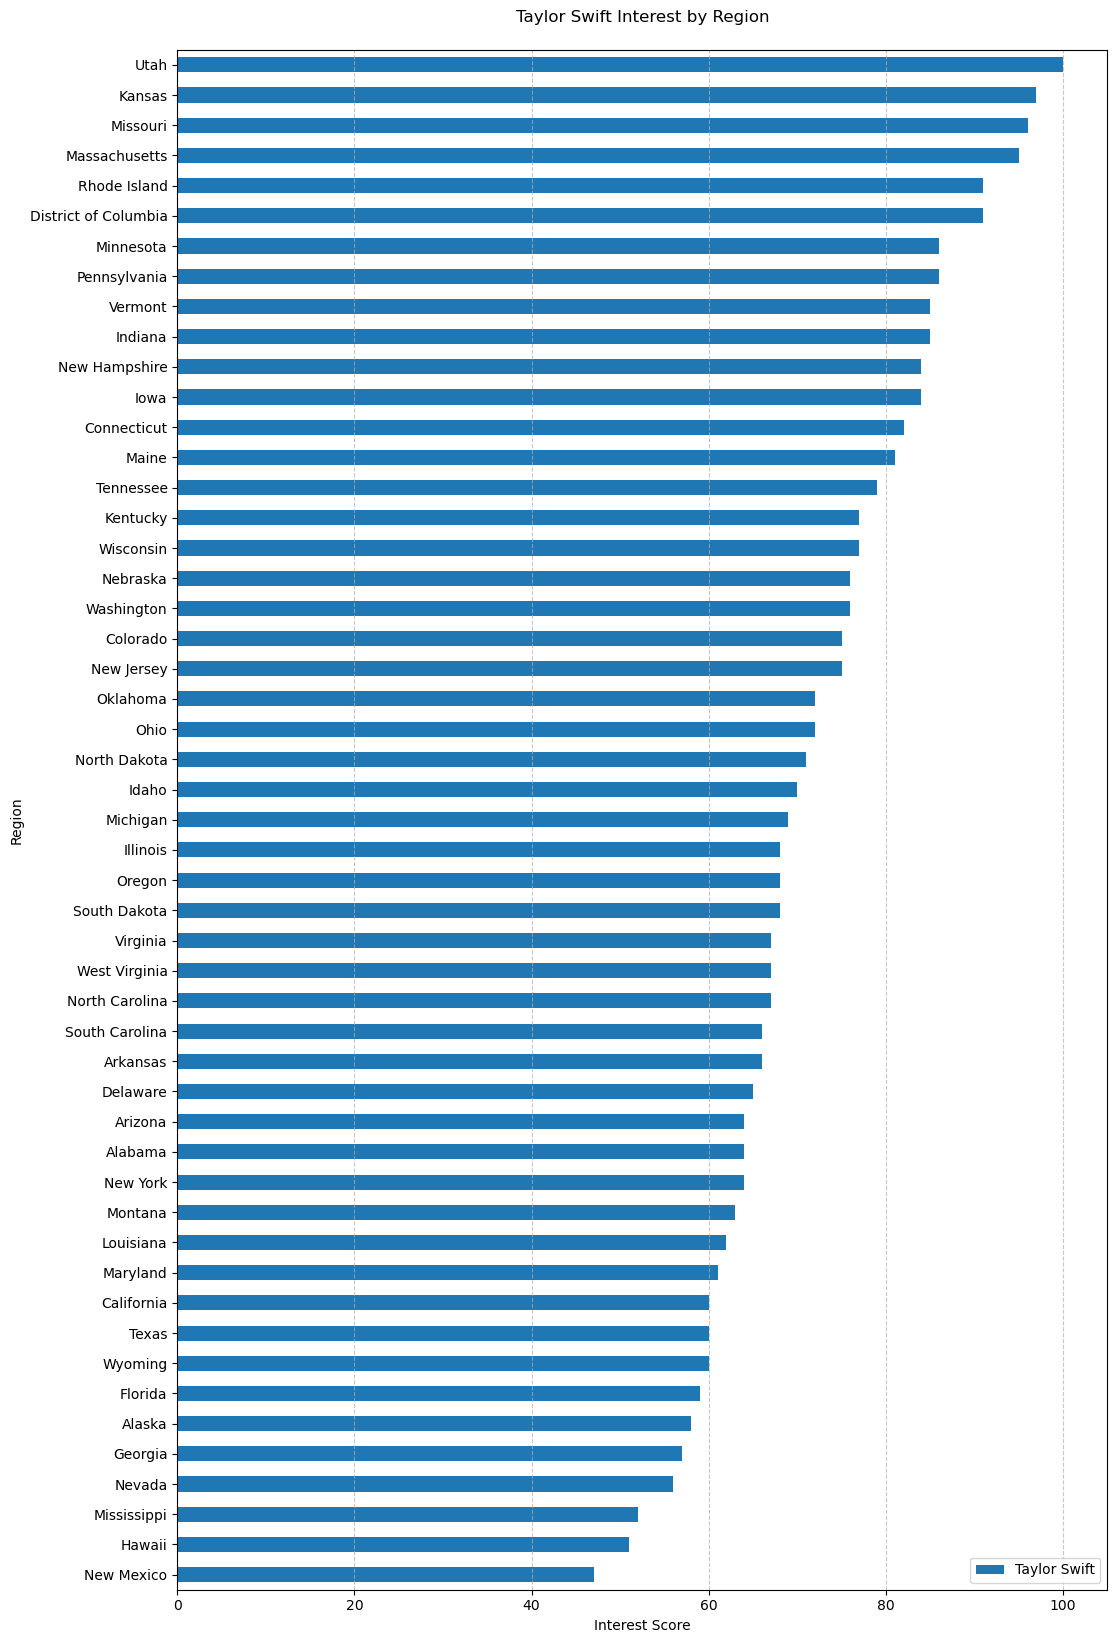

In [23]:
# More styled version
fig, ax = plt.subplots(figsize=(12, 20))
(df.sort_values(search_word, ascending=True)
   .reset_index()
   .plot(x='geoName', 
         y=search_word, 
         kind='barh',
         ax=ax))

plt.title(search_word+' Interest by Region', pad=20)
plt.xlabel('Interest Score')
plt.ylabel('Region')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

Also, you use the parameter `resolution = 'COUNTRY_NAME'` to filter the results.



---



## Google Keyword Suggestions

Let us see how can we obtain google's keyword suggestion. If you don't know what I'm talking about. The below image explains things more clear.

![alt text](https://cdn-images-1.medium.com/max/1200/1*QRpWWBS1SHXBr71Jp1NwQA.png)

In [25]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Mercedes Benz')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Mercedes-Benz,Car make
1,Mercedes-Benz C-Class,Luxury car
2,Mercedes-Benz Sprinter,Van
3,Mercedes-Benz S-Class,Luxury
4,Mercedes-Benz Vito,Car model




---



This is the end of the tutorial, I hope you have learned a thing or two. If you have any doubts regarding the tutorial let me know via the comment section. Although this is a short tutorial there is a lot to learn. Have a good day!!!